Sales Summary:
    product  total_qty  revenue
0   Apples         16     40.0
1  Bananas         12     12.0
2  Oranges         12     18.0


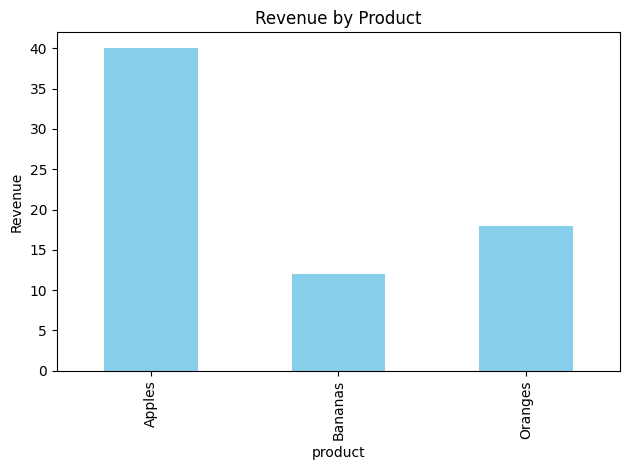

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create database and connect
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Step 3: Insert sample data
sample_data = [
    (1, 'Apples', 10, 2.5),
    (2, 'Bananas', 5, 1.0),
    (3, 'Oranges', 8, 1.5),
    (4, 'Apples', 6, 2.5),
    (5, 'Bananas', 7, 1.0),
    (6, 'Oranges', 4, 1.5)
]

cursor.executemany('INSERT INTO sales (id, product, quantity, price) VALUES (?, ?, ?, ?)', sample_data)
conn.commit()

# Step 4: Run SQL query
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)

# Step 5: Display output
print("Sales Summary:\n", df)

# Step 6: Plot bar chart
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close connection
conn.close()
